# Dealing with missing values

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thorugh Sklearn 

# Univariate imputer and Multivariate imputer
- Univariate imputer: It is used to fill missing values in a single variable (column) using the mean, median, or mode of that variable.
- Multivariate imputer: It is used to fill missing values in multiple variables (columns) using the relationships between those variables. It can use techniques like regression, k-nearest neighbors, or other algorithms to predict the missing values based on the values of other variables in the dataset.

In [ ]:
# Univariate Imputation
from sklearn.impute import SimpleImputer # simple imputer is also known as univariate imputation
df=sns.load_dataset('titanic')
# impute age column using simple imputer
imputer = SimpleImputer(strategy='mean') # we can do through median or most_frequent as well
df['age'] = imputer.fit_transform(df[['age']])

- max_iter is a parameter that specifies the maximum number of iterations for the imputation process. It is used to control the convergence of the algorithm. In most cases, the default value is sufficient, but you can adjust it if you encounter convergence issues or if you want to limit the number of iterations for performance reasons. 

- Random_state is used to set the seed for the random generator so that we can ensure that the results that we get can be reproduced.

In [8]:
# Multivariate Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df=sns.load_dataset('titanic')
print("Missing values in age column before imputation:", df['age'].isnull().sum())
# impute age column using iterative imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
df['age'] = imputer.fit_transform(df[['age']])
print("Missing values in age column after imputation:", df['age'].isnull().sum())

Missing values in age column before imputation: 177
Missing values in age column after imputation: 0


# KNN Imputation 

- he k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. It is one of the popular and simplest classification and regression classifiers used in machine learning today.

In [16]:
# KNN Imputation
from sklearn.impute import KNNImputer
df=sns.load_dataset('titanic')
print("Missing values in age column before imputation:", df['age'].isnull().sum())
# impute age column using KNN imputer
imputer = KNNImputer(n_neighbors=5)
df['age'] = imputer.fit_transform(df[['age']])
print("Missing values in age column after imputation:", df['age'].isnull().sum())


Missing values in age column before imputation: 177
Missing values in age column after imputation: 0


In [4]:
# Load the dataset
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


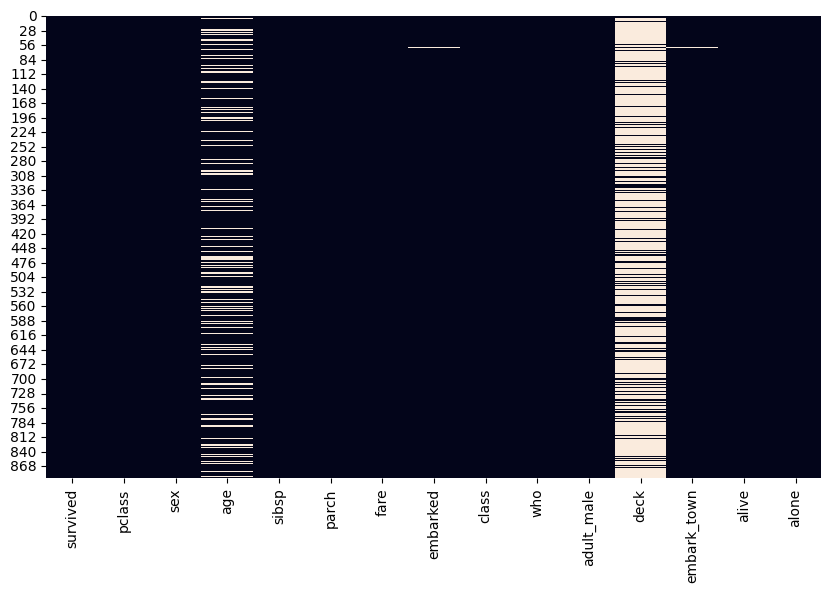

In [6]:
# Visualize the data  thorugh plt
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False)
plt.show()


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [11]:
# % wise
round(df.isnull().sum().sort_values(ascending=False)/len(df)*100,2)


deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
sex             0.00
pclass          0.00
survived        0.00
fare            0.00
parch           0.00
sibsp           0.00
class           0.00
adult_male      0.00
who             0.00
alive           0.00
alone           0.00
dtype: float64

# MSNO Matrix 

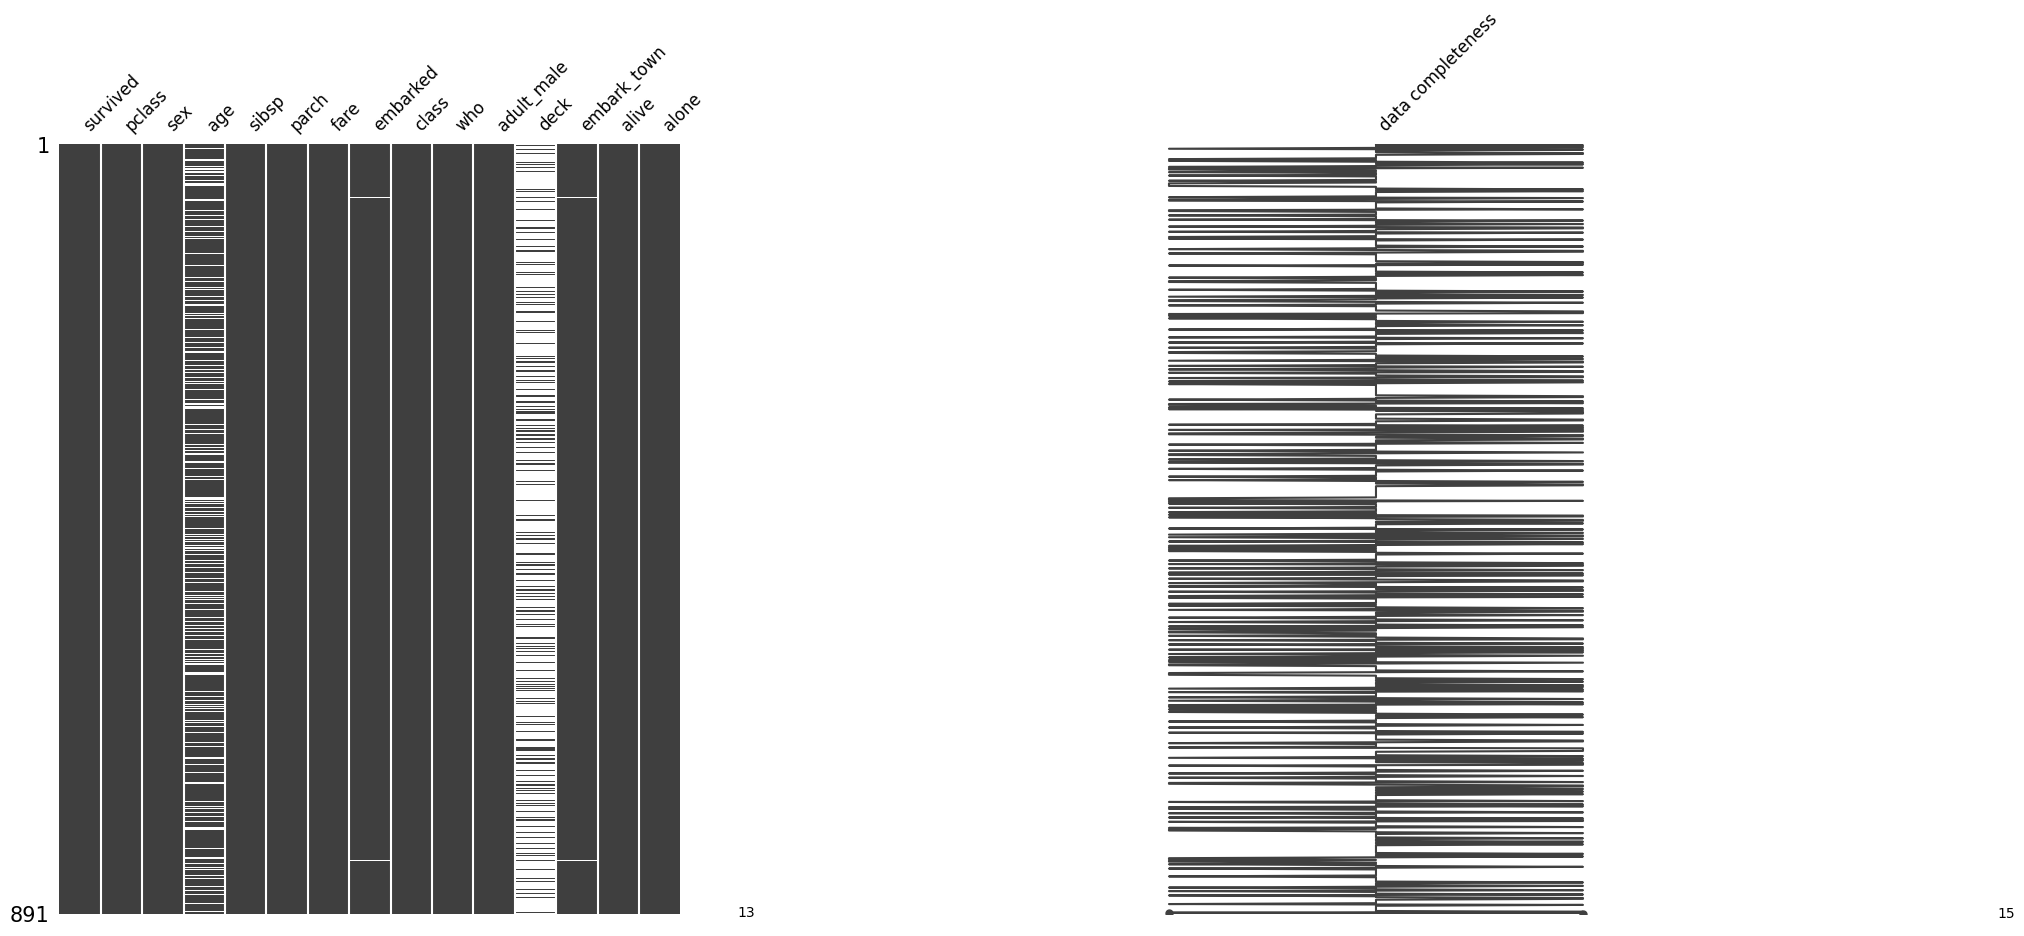

In [14]:
import missingno as msno
msno.matrix(df,labels=True,fontsize=12,width_ratios=(2,4))
plt.show()

# Forward and Backward Fill 

In [14]:
df=sns.load_dataset('titanic')
print("Missing values in age column before imputation:", df['age'].isnull().sum())

df['age']=df['age'].ffill()
print("Missing values in age column after imputation:", df['age'].isnull().sum())

print("_____________________Let see backward fill__________________________")
df=sns.load_dataset('titanic')
print("Missing values in age column before imputation:", df['age'].isnull().sum())
df['age']=df['age'].bfill()
print("Missing values in age column after imputation:", df['age'].isnull().sum())




Missing values in age column before imputation: 177
Missing values in age column after imputation: 0
_____________________Let see backward fill__________________________
Missing values in age column before imputation: 177
Missing values in age column after imputation: 0


# Drop Na function

In [ ]:
# It is a function that drops all rows having missing values, but it is not a good approach
# Let's do it
df = sns.load_dataset('titanic')
print("Shape of data before dropping missing values:", df.shape)
df.dropna(inplace=True)
print("Shape of data after dropping missing values:", df.shape)


Shape of data before dropping missing values: (891, 15)
Shape of data after dropping missing values: (182, 15)


# Drop the Column 

In [21]:
print("The missing value in the deck column is ", df['deck'].isnull().sum()/len(df['deck'])*100)

The missing value in the deck column is  77.21661054994388


In [22]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [15]:
# Drop the column
df.drop(columns=['deck'],inplace=True)


In [29]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embark_town      2
survived         0
age              0
sibsp            0
pclass           0
sex              0
fare             0
parch            0
embarked         0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [27]:
df['embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: embarked, dtype: object

#  fill through mean,median,mode 

In [28]:
df=sns.load_dataset('titanic')
# Through mean
df['age'].fillna(df['age'].mean(),inplace=True)
# Through mode
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_12388\723559273.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_12388\723559273.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,